# The Sparks Foundation- GRIP- Data Science and Business Analytics- Aug-2021

Author - Suraj Shrimant Mane

Task 2:- Prediction using Unsupervised ML

Level : Beginner

Language-Python

Software-Jupyter Notebook

DataSet can be downloaded from this link :- https://bit.ly/3kXTdox

Problem statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

# Importing Required Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
dat = pd.read_csv('iris.csv')
dat

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

In [3]:
dat.rename(columns={'SepalLengthCm':'SepalLength', 
                               'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)

In [4]:
dat['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)

In [5]:
dat=dat.drop("Id", axis=1)
dat.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Checking Null Values

In [6]:
dat.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [7]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dat.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization & Correlation Matrix

<AxesSubplot:>

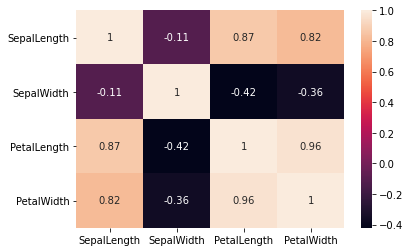

In [9]:
sns.heatmap(dat.corr(),annot=True)

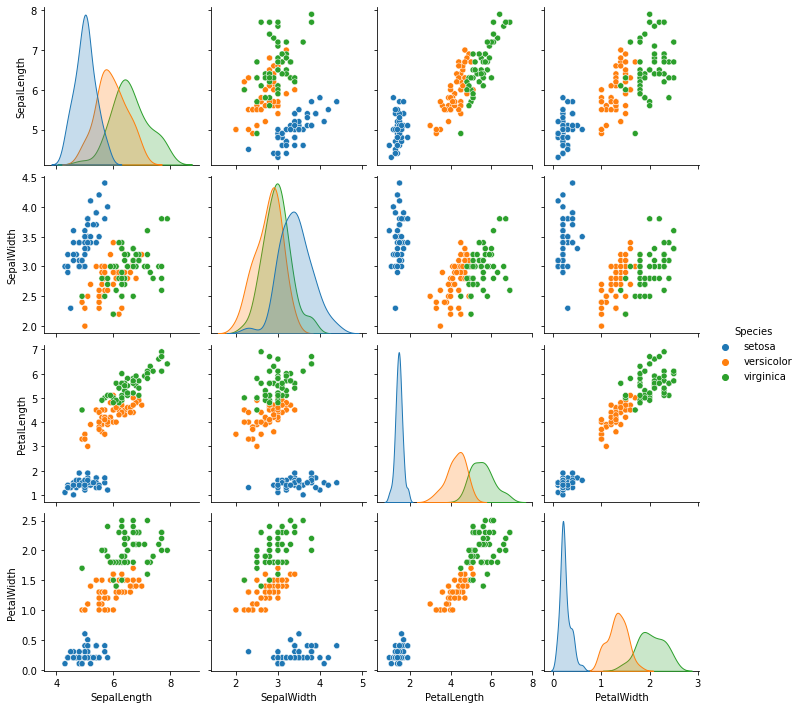

In [10]:
sns.pairplot(dat,hue='Species')

In [11]:
x = dat.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting The Elbow Graph To Find Optimal Value Of 'K'

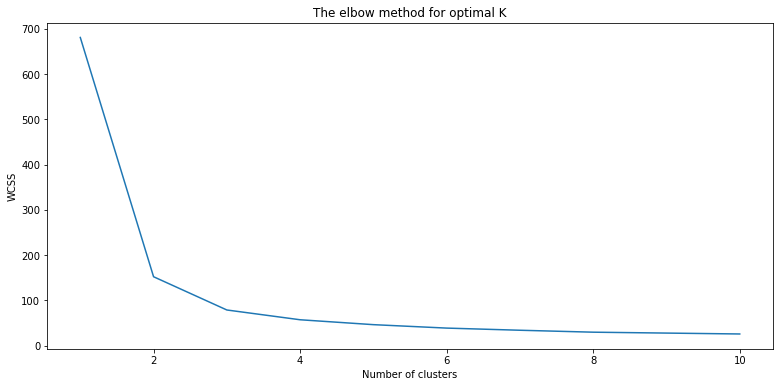

In [12]:
plt.figure(figsize=(13,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Implementing K-Means Clustering
 Applying k-means to the dataset. 
 Creating the k-means classifier.
 

# Applying K-means Cluster n_clusters = 3

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=3)
iris_k_model.fit(x)
print(iris_k_model.labels_)
print(iris_k_model.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=3')

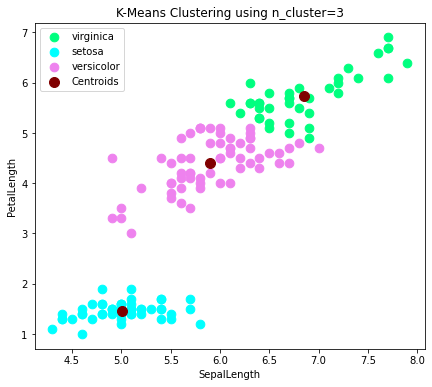

In [14]:
plt.figure(figsize=(7,6))
plt.scatter(dat.iloc[y_kmeans==0,0],dat.iloc[y_kmeans==0,2],s=75,c='springgreen',label='virginica')
plt.scatter(dat.iloc[y_kmeans==1,0],dat.iloc[y_kmeans==1,2],s=75,c='cyan',label='setosa')
plt.scatter(dat.iloc[y_kmeans==2,0],dat.iloc[y_kmeans==2,2],s=75,c='violet',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='maroon',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=3')

# Applying K-means Cluster n_clusters = 5

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=5)
iris_k_model.fit(x)
print(iris_k_model.labels_)
print(iris_k_model.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 4 1 2 4 4 2 3 2 4 2 4
 4 4 1 4 4 4 2 2 1 4 1 2 1 4 2 1 1 4 2 2 2 4 1 1 2 4 4 1 4 4 4 1 4 4 4 1 4
 4 1]
[[5.006      3.418      1.464      0.244     ]
 [6.24722222 2.84722222 4.775      1.575     ]
 [7.475      3.125      6.3        2.05      ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=5')

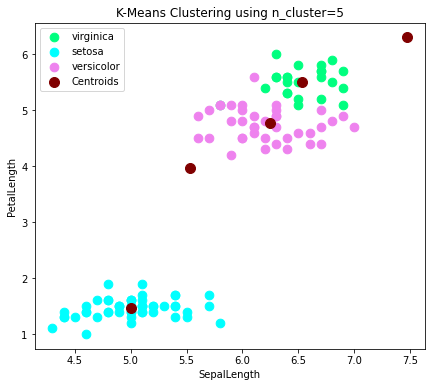

In [16]:
plt.figure(figsize=(7,6))
plt.scatter(dat.iloc[y_kmeans==0,0],dat.iloc[y_kmeans==0,2],s=75,c='springgreen',label='virginica')
plt.scatter(dat.iloc[y_kmeans==1,0],dat.iloc[y_kmeans==1,2],s=75,c='cyan',label='setosa')
plt.scatter(dat.iloc[y_kmeans==2,0],dat.iloc[y_kmeans==2,2],s=75,c='violet',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='maroon',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=5')

# n_cluster = 3 is better cluster formation as compared n_cluster = 5